In [3]:
import os
import sys
sys.path.append(os.path.join(os.getcwd().replace("notebooks/large_models", "")))

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from config import Config
from data.dataset import NetworkDataset, load_datasets, get_subset
from model.mlp import MLP
from model_config import MLP_Models, LSTM_Models, GRU_Models, CNN_models
from utils.benchmark import Benchmark
import warnings
warnings.filterwarnings("ignore")

In [4]:
conf = Config()
#load_model = MLP_Models()
#load_model = LSTM_Models()
#load_model = GRU_Models()
load_model = CNN_models()
model_conf = load_model.cnn_4
model = load_model.get_model(model_conf)
model.load()
print(conf.device)

Checkpoint loaded from /home/ubuntu/Network-Packet-ML-Model/checkpoint/large_model/cnn_4.pth!
cpu


In [5]:
# data loader
X_train, y_train, X_val, y_val, X_test, y_test = load_datasets(conf.datasets, model_type=load_model.type)

# create train, val and test dataloaders
dataset = NetworkDataset(X_test, y_test)
subset, length = get_subset(dataset, y_test)
loader = DataLoader(subset, conf.batch_size, shuffle=True)
assert conf.batch_size < length

Warmup Done!
Memory Benchmark Done!
Latency Benchmark Done!
Throughput Benchmark Done!
CPU Benchmark Done!
Metrics Benchmark Done!


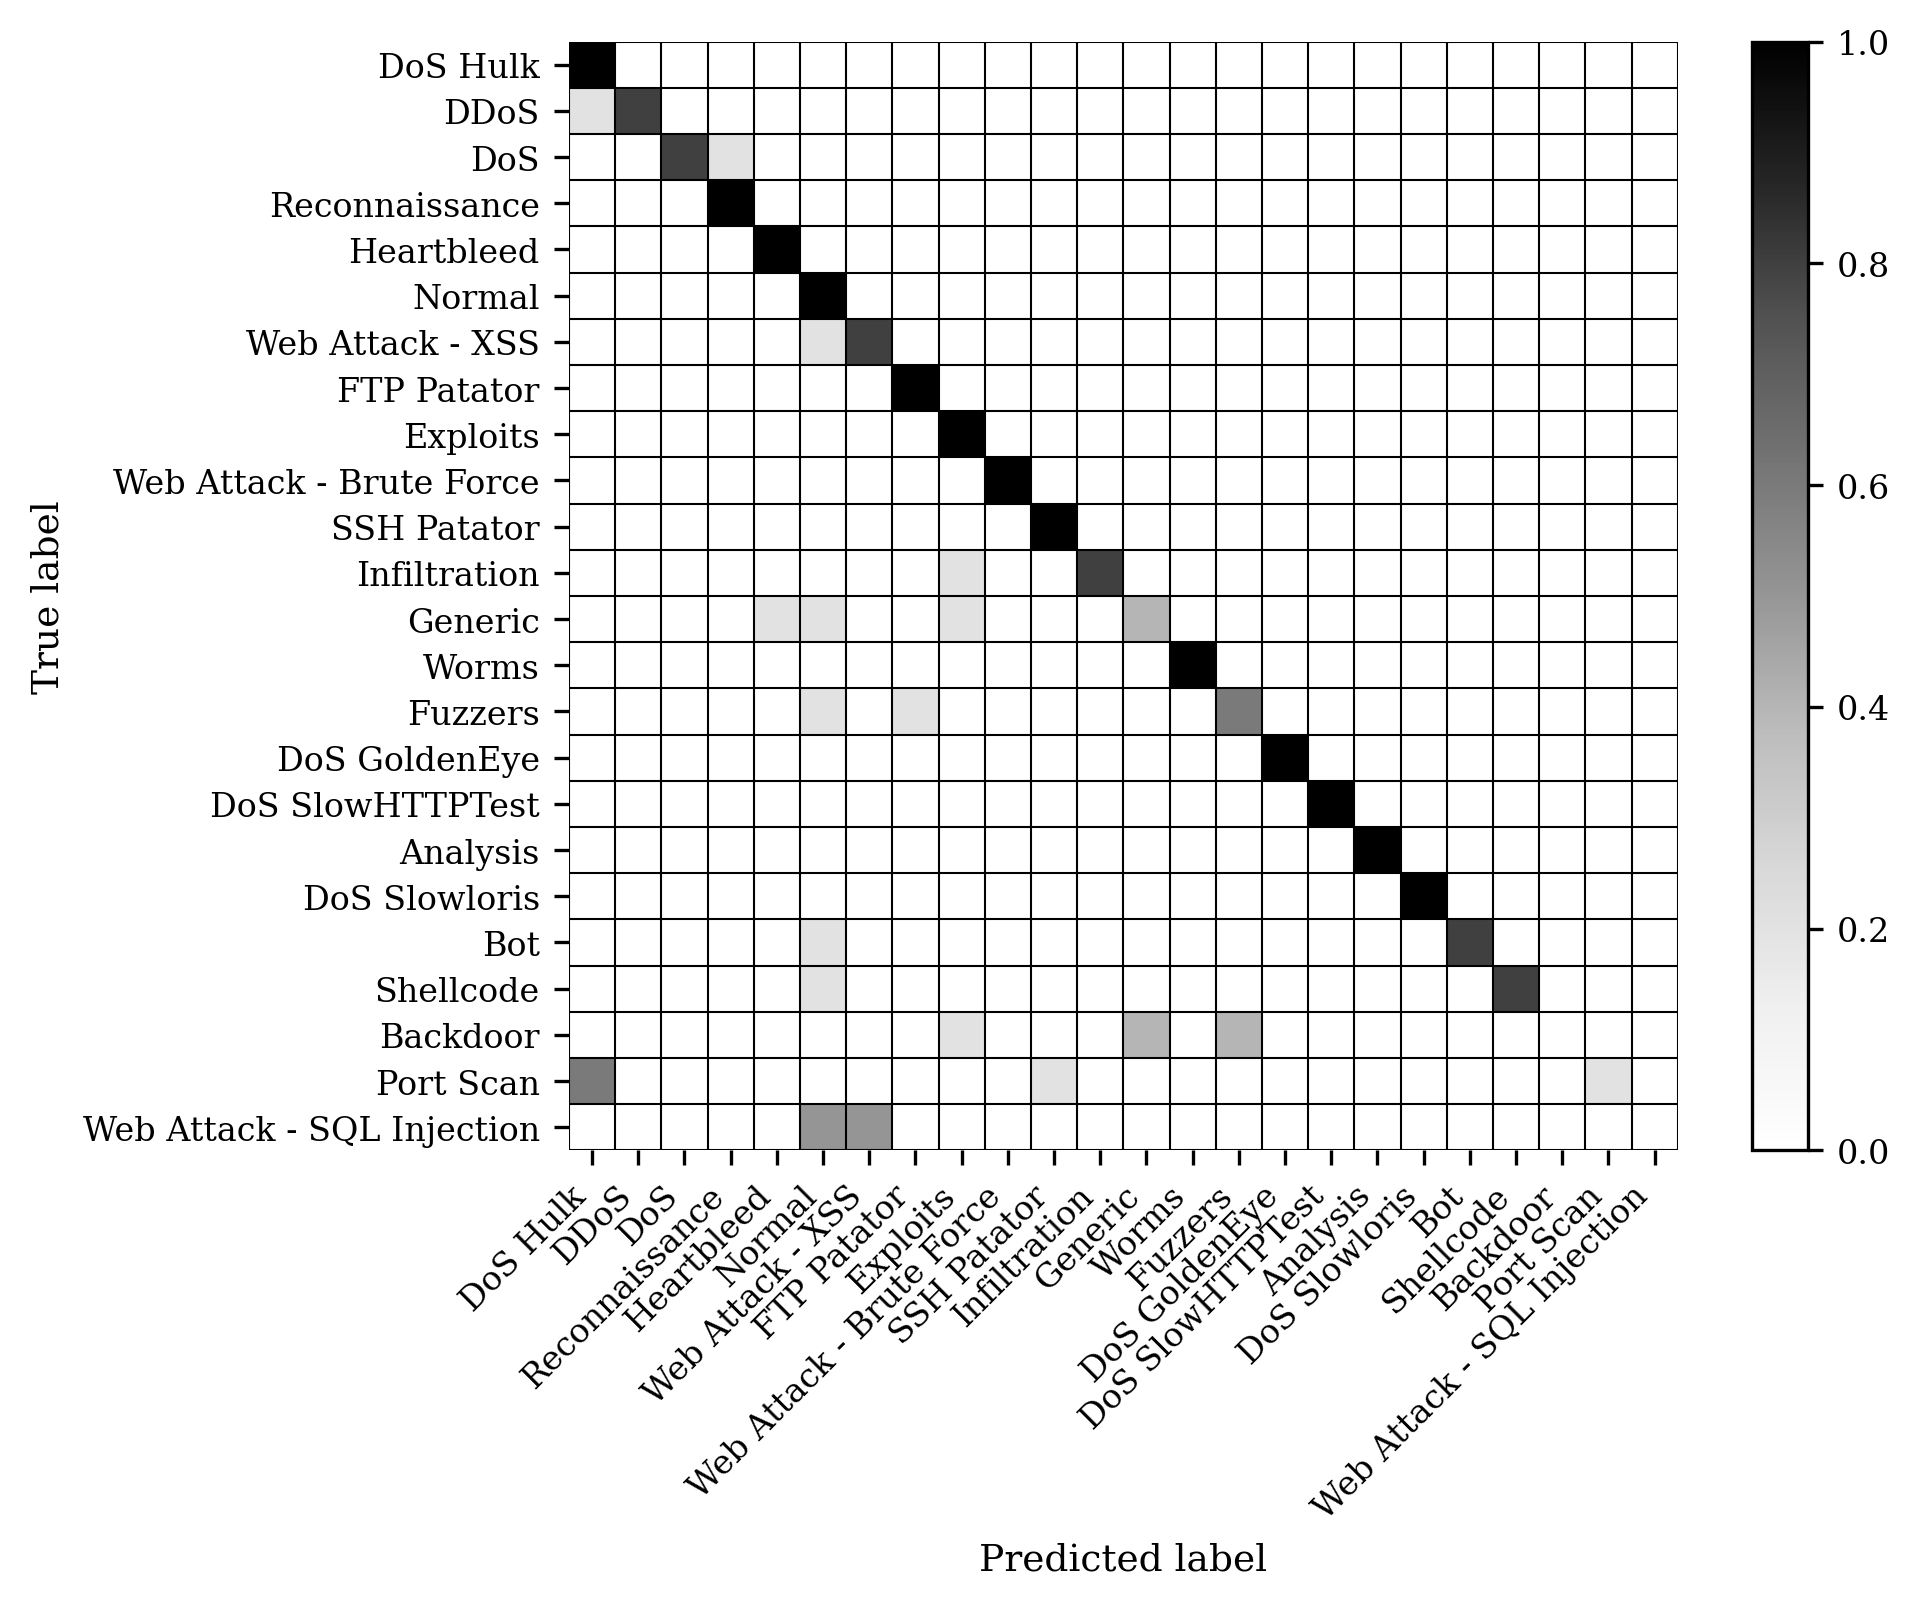

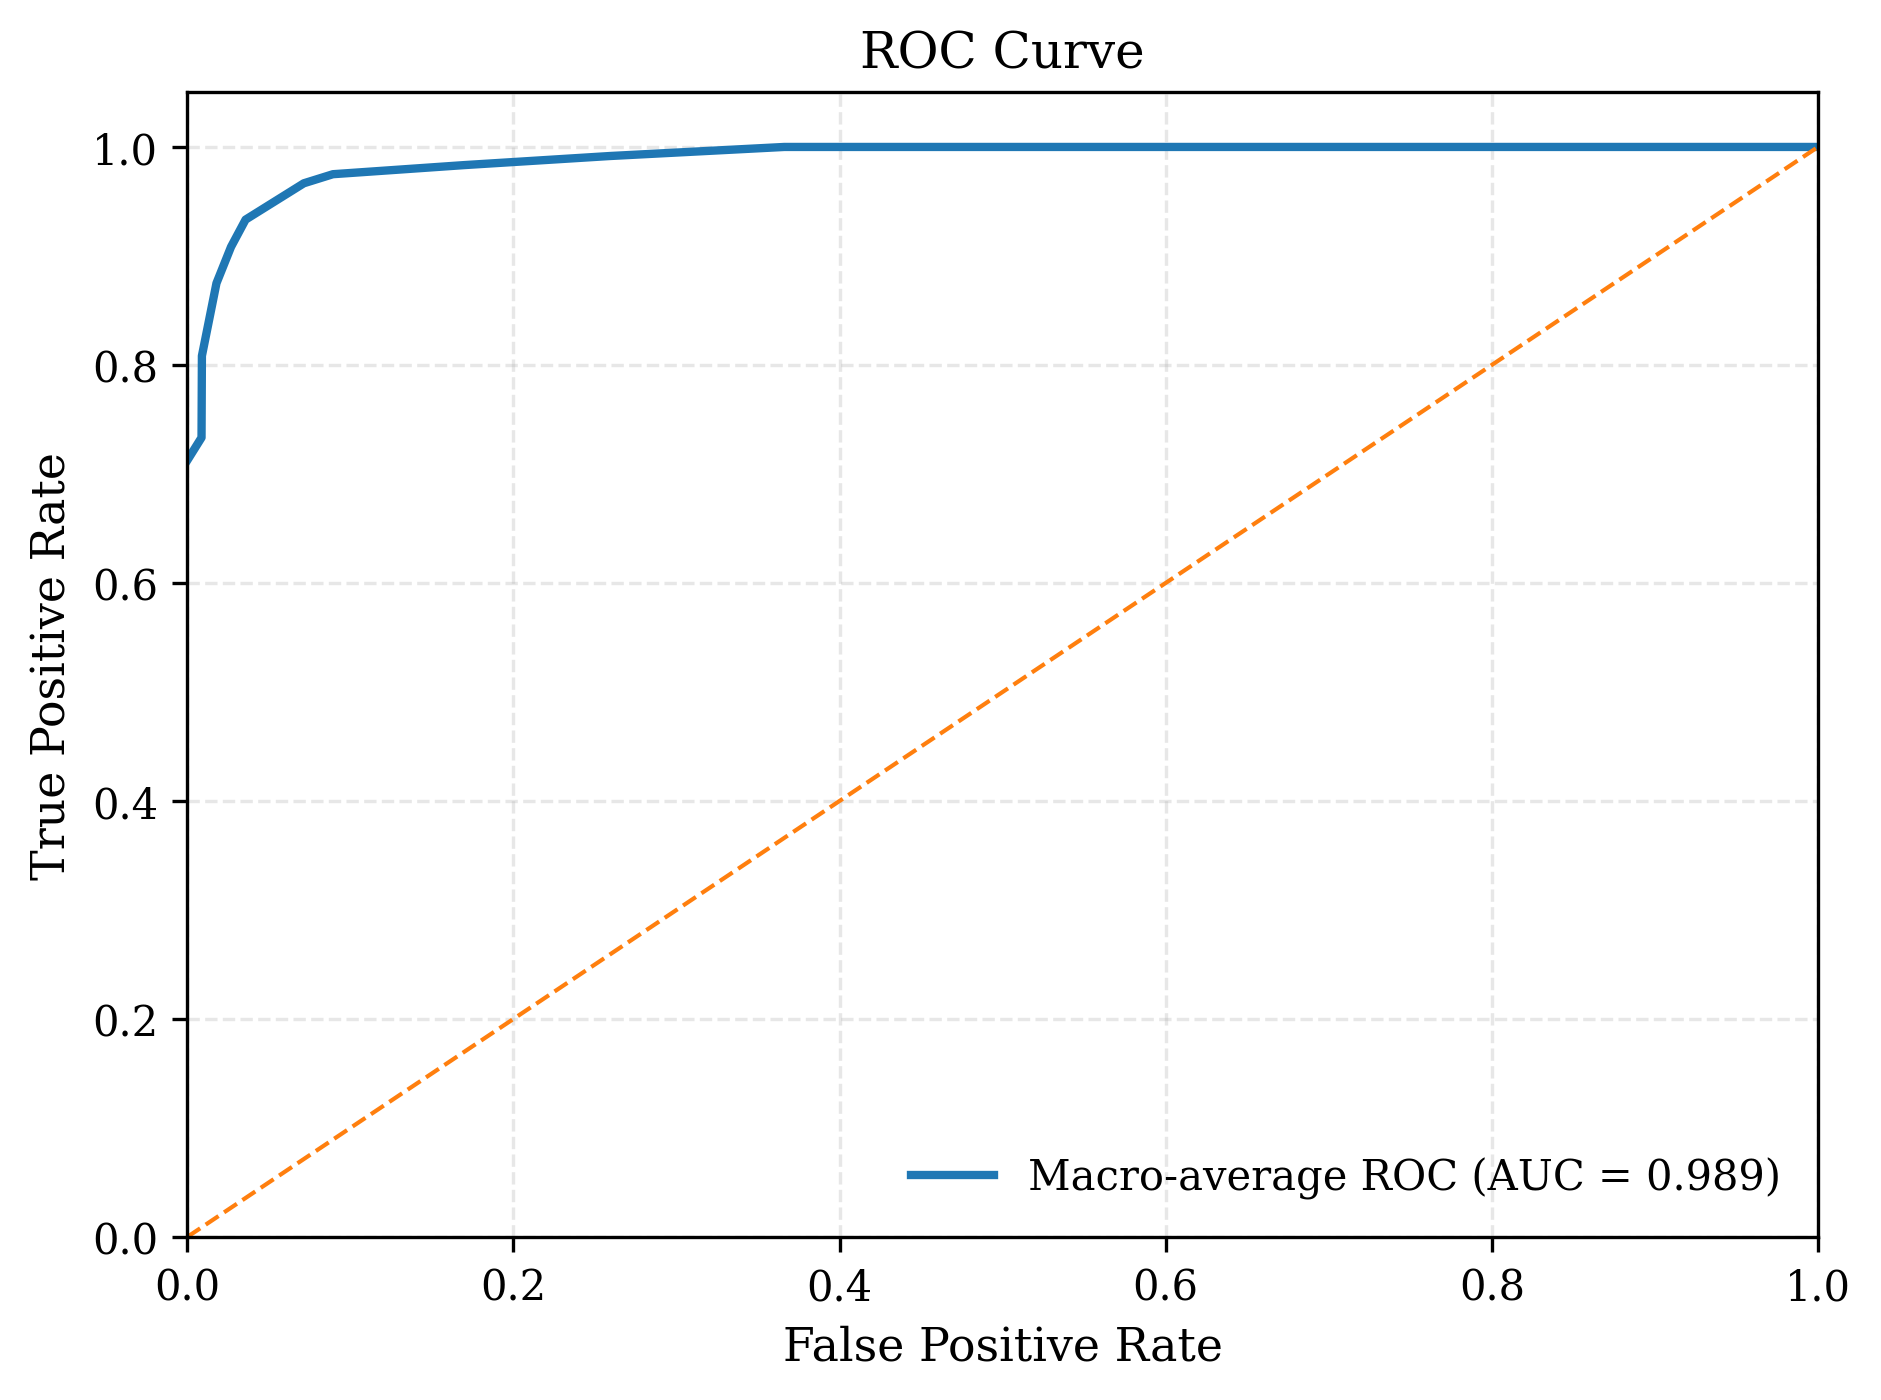

,Section,Metric,Value
0,Info,Name,cnn_4
1,Info,Batch Size,1
2,Info,Samples,117
3,Info,Location,DPU
4,Memory,Avg. (MB),0.493
5,Memory,Peak (MB),13.174
6,Memory,Model (MB),10.020
7,Latency,Total (ms),1374.705
8,Latency,Avg. (ms),11.750
9,Latency,Min (ms),10.576


In [6]:
name = model_conf["name"]
result_path = os.path.join(conf.benchmark_dpu, "large_model", name + ".csv")
plot_path = plot_path = os.path.join(conf.plot, conf.location, "large_model")

# run benchmark
benchmark = Benchmark(model, loader, conf.batch_size, name, result_path, runs=length)
benchmark(plot=True, plot_path=plot_path)

# print and save result
benchmark.print_result()
benchmark.save()